[2025-10-03 Fiddler](https://thefiddler.substack.com/p/when-will-you-cross-your-path)
====================

Fiddler
-------
To cross over with the 3 inch line, the path must make an isosceles triangle with a 2 inch
base and and sides of no more than 1 inch, which is when $\varphi = \pi$.

In [1]:
def path(n, phi):
    x = 0
    y = 0
    alpha = 0
    pts = [(x,y)]
    for l in [1..n]:
        x += l*cos(alpha)
        y += l*sin(alpha)
        alpha += phi
        pts.append((x,y))
    l = n/1.9
    return polygon([(l,l),(l,-l),(-l,-l),(-l,l)],
                   fill=false,axes=false,alpha=0.1)+line(pts)

To cross over with the 4 inch line, the path must make an isosceles triangle
with a 3 inch base and sides of no more than 2 inches.  The minimum $\varphi$
is when the sides are 2 inches, so $\cos(\pi-\varphi) = 3/4$.

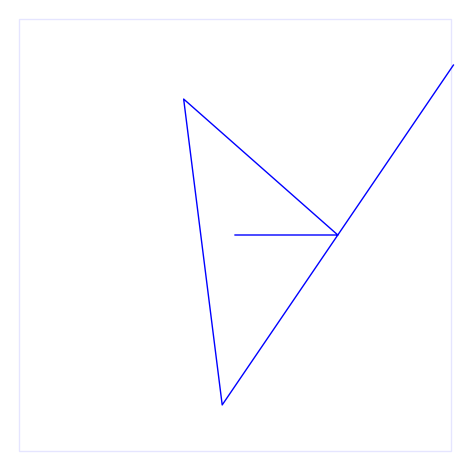

In [2]:
path(4,pi-arccos(3/4))

Graphical exploration suggests that the minimum $\varphi$ for which the 5 inch and
greater lines to intersect the 1 inch line is greater than for the 4 inch line,
but I don't have a proof for that.

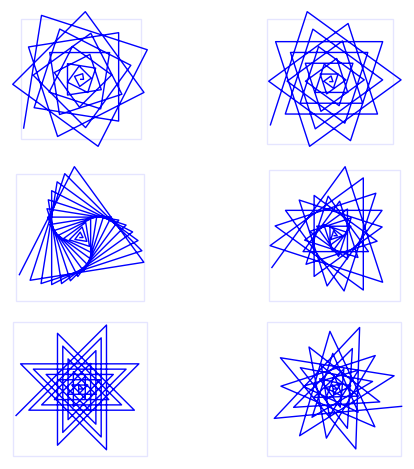

In [3]:
graphics_array([[path(40,0.55*pi),path(40,0.6*pi)],
                [path(40,0.65*pi),path(40,0.7*pi)],
                [path(40,0.75*pi),path(40,0.77*pi)]])

Assuming that the minimum $\varphi$ for the lines longer than the 4 inch line
is greater than the minimum $\varphi$ for the 4 inch line, the answer is 4 and
the extra credit answer is $\pi-\arccos(3/4) \approx 138.6\degree$.

In [4]:
numerical_approx((pi - arccos(3/4))*180/pi)

138.590377890729

Initial thoughts
----------------
Given $\varphi$, the distance from the origin to the start of the $n$ inch line, and
the minimum distance from the origin to the $n$ inch line, it should be possible to
calculate the distance from the origin to the start of the $n+1$ inch line and the
minimum distance from the origin to the $n+1$ inch line.

Let $a_n$ be the distance from the origin to the start of the $n$ inch line, and let
$b_n \le a_n$ be the minimum distance from the origin to the $n$ inch line.

Then, $c_n = \sqrt{a_n^2-b_n^2}$ is the distance from the start of the line to the
point on the line closest to the origin, and
$a_{n+1} = \sqrt{b_n^2 + (n-c_n)^2} = \sqrt{a_n^2+n^2-2n\sqrt{a_n^2-b_n^2}}$.

Working through the trigonometry, $b_{n+1} = a_{n+1} \sin(\varphi + \arcsin(b_n/a_{n+1}))$.

Let $b_n = f_na_n$, where $0 \le f_n \le 1$.  Then,

$$\begin{aligned}
    a_{n+1} &= a_n\sqrt{1 + \frac{n^2}{a_n^2} - \frac{2n}{a_n}\sqrt{1-f_n^2}} \\
    f_{n+1} &= \sin\left(\varphi
            + \arcsin\left(f_n\sqrt{1 + \frac{n^2}{a_n^2} - \frac{2n}{a_n}\sqrt{1-f_n^2}}\right)\right) \\
\end{aligned}$$

I think the argument will be that below some minimum $\varphi$, $a_n$ will always increase
as $n$ increases and that $\varphi + \arcsin(\ldots)$ will never be close to $\pi$, but I'm not seeing
how to do that.

In [5]:
def ab(phi):
    n = 1
    a = 0
    b = 0
    x = 0
    y = 0
    alpha = 0
    while True:
        yield (n,a,b,numerical_approx(sqrt(x^2+y^2)),b/a if a != 0 else 0)
        x += n*cos(alpha)
        y += n*sin(alpha)
        alpha += phi
        a = numerical_approx(sqrt(a^2 + n^2 - 2*n*sqrt(a^2-b^2)))
        b = numerical_approx(a*sin(phi+arcsin(b/a)))
        n = n+1

In [6]:
for (n,a,b,r,f) in ab(2.4):
    print((n,a,b,r,f))
    if n > 20:
        break

(1, 0, 0, 0.000000000000000, 0)
(2, 1.00000000000000, 0.675463180551151, 1.00000000000000, 0.675463180551151)
(3, 1.43193056320306, 0.354761752266462, 1.43193056320305, 0.247750667094431)
(4, 1.65127055686727, 0.827728187830924, 1.65127055686727, 0.501267453954522)
(5, 2.70111819998238, 1.12636784217241, 2.70111819998238, 0.417000574865534)
(6, 2.78305733762592, 0.888434578513457, 2.78305733762591, 0.319229707021177)
(7, 3.47794805970765, 1.61615909140378, 3.47794805970765, 0.464687529445058)
(8, 4.24042815872300, 1.45631657071261, 4.24042815872300, 0.343436208845282)
(9, 4.27330046361735, 1.63978897884132, 4.27330046361734, 0.383728921661933)
(10, 5.31320934678151, 2.20451187862498, 5.31320934678152, 0.414911541168685)
(11, 5.61644673756402, 1.86365641640202, 5.61644673756402, 0.331821257012459)
(12, 5.99861462734298, 2.47708604867175, 5.99861462734298, 0.412943021440426)
(13, 6.99032696469675, 2.58872637992091, 6.99032696469675, 0.370329799020097)
(14, 7.00274423276048, 2.48611417087